### 1. Abstract

# El objetivo de este proyecto es realizar un análisis exploratorio de datos sobre videojuegos disponibles en la plataforma Steam, utilizando un dataset obtenido de Kaggle. Esta base de datos contiene información detallada de más de 27.000 títulos, incluyendo variables como el precio, la fecha de lanzamiento, la desarrolladora, la valoración positiva y negativa de los usuarios, el tiempo promedio de juego y el género, entre otros.

# El análisis busca comprender qué factores influyen en las valoraciones de los juegos, cómo varían los precios según el tipo de juego, y qué tendeZncias se observan en el mercado de videojuegos en Steam a lo largo del tiempo. A partir de estas preguntas, se plantearon hipótesis relacionadas con la relación entre precio y valoración, la diferencia de precio entre géneros, y el comportamiento de los juegos más nuevos en cuanto al tiempo de juego promedio.

# Para responder a estas preguntas se utilizarán técnicas de visualización de datos en Python con librerías como `matplotlib`, `seaborn` y `pandas`, junto con estadísticas descriptivas que permitan interpretar los datos desde un enfoque cuantitativo y visual.

# Se espera que los resultados obtenidos permitan identificar patrones de comportamiento entre los distintos tipos de videojuegos, reconocer qué géneros dominan el mercado en términos de cantidad y valoración, y comprender cómo evoluciona el precio promedio de los juegos a lo largo de los años. También se evaluará si existen diferencias notorias entre juegos single player y multiplayer respecto a las valoraciones recibidas.

# Este trabajo representa la primera parte de un análisis más profundo que será desarrollado en futuras etapas, donde se buscará profundizar en modelos predictivos y conclusiones más robustas. En esta etapa inicial, se prioriza el análisis exploratorio y la comprensión visual del conjunto de datos.


## 📘 Diccionario de Variables – Dataset Steam

| **Variable**         | **Descripción**                                                                 |
|----------------------|---------------------------------------------------------------------------------|
| `app_name`           | Nombre del juego en Steam                                                       |
| `release_date`       | Fecha de lanzamiento del juego                                                 |
| `english`            | Indica si el juego está disponible en inglés (1: sí, 0: no)                     |
| `developer`          | Nombre del desarrollador del juego                                             |
| `publisher`          | Nombre del publicador del juego                                                |
| `required_age`       | Edad mínima requerida para jugar                                                |
| `categories`         | Categorías del juego (ej: Single-player, Multi-player, etc.)                   |
| `genres`             | Géneros del juego (ej: Action, Adventure, etc.)                                 |
| `steamspy_tags`      | Etiquetas extraídas por SteamSpy (subjetivas, basadas en la comunidad)         |
| `achievements`       | Número de logros disponibles en el juego                                       |
| `positive_ratings`   | Número total de valoraciones positivas recibidas                               |
| `negative_ratings`   | Número total de valoraciones negativas recibidas                               |
| `average_playtime`   | Tiempo promedio jugado (en minutos) entre todos los jugadores                   |
| `median_playtime`    | Tiempo mediano jugado (en minutos) entre todos los jugadores                    |
| `owners`             | Estimación del rango de usuarios que poseen el juego (ej: 20000-50000)          |
| `price`              | Precio actual del juego en dólares (USD)                                       |
| `votos_totales`      | Variable creada: suma de valoraciones positivas y negativas                    |
| `es_valorado`        | Variable creada: 1 si el % de valoraciones positivas es mayor a 70%, 0 si no   |
| `playtime_categoria` | Variable creada: clasifica `average_playtime` en categorías (poco, medio, mucho)|
| `precio_categoria`   | Variable creada: clasifica `price` en categorías (barato, medio, caro)          |


In [62]:
# Carga del Dataset
import pandas as pd

df = pd.read_csv("/content/steam.csv")


In [63]:
# Mostrar las primeras filas
df.head()


,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99


In [64]:
# Ver forma y columnas
print("Filas y columnas:", df.shape)
print("\nColumnas:")
print(df.columns)

Filas y columnas: (27075, 18)

Columnas:
Index(['appid', 'name', 'release_date', 'english', 'developer', 'publisher',
       'platforms', 'required_age', 'categories', 'genres', 'steamspy_tags',
       'achievements', 'positive_ratings', 'negative_ratings',
       'average_playtime', 'median_playtime', 'owners', 'price'],
      dtype='object')


In [65]:
# Info general del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27075 entries, 0 to 27074
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   appid             27075 non-null  int64  
 1   name              27075 non-null  object 
 2   release_date      27075 non-null  object 
 3   english           27075 non-null  int64  
 4   developer         27074 non-null  object 
 5   publisher         27061 non-null  object 
 6   platforms         27075 non-null  object 
 7   required_age      27075 non-null  int64  
 8   categories        27075 non-null  object 
 9   genres            27075 non-null  object 
 10  steamspy_tags     27075 non-null  object 
 11  achievements      27075 non-null  int64  
 12  positive_ratings  27075 non-null  int64  
 13  negative_ratings  27075 non-null  int64  
 14  average_playtime  27075 non-null  int64  
 15  median_playtime   27075 non-null  int64  
 16  owners            27075 non-null  object

In [66]:
# Estadísticas básicas de columnas numéricas
df.describe()

,appid,english,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price
count,2.707500e+04,27075.000000,27075.000000,27075.000000,2.707500e+04,27075.000000,27075.000000,27075.00000,27075.000000
mean,5.962035e+05,0.981127,0.354903,45.248864,1.000559e+03,211.027147,149.804949,146.05603,6.078193
std,2.508942e+05,0.136081,2.406044,352.670281,1.898872e+04,4284.938531,1827.038141,2353.88008,7.874922
min,1.000000e+01,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.00000,0.000000
25%,4.012300e+05,1.000000,0.000000,0.000000,6.000000e+00,2.000000,0.000000,0.00000,1.690000
50%,5.990700e+05,1.000000,0.000000,7.000000,2.400000e+01,9.000000,0.000000,0.00000,3.990000
75%,7.987600e+05,1.000000,0.000000,23.000000,1.260000e+02,42.000000,0.000000,0.00000,7.190000
max,1.069460e+06,1.000000,18.000000,9821.000000,2.644404e+06,487076.000000,190625.000000,190625.00000,421.990000


### 2. Carga del Dataset

Se carga el dataset con la librería `pandas`, y se realiza una primera exploración de las columnas disponibles, el tipo de datos y la cantidad de registros. A continuación se muestran las primeras filas del dataset junto con estadísticas descriptivas iniciales.


# 3. Limpieza de Datos



In [67]:
# Revisar valores faltantes
faltantes = df.isnull().sum()
print("Valores faltantes por columna:\n", faltantes)

Valores faltantes por columna:
 appid                0
name                 0
release_date         0
english              0
developer            1
publisher           14
platforms            0
required_age         0
categories           0
genres               0
steamspy_tags        0
achievements         0
positive_ratings     0
negative_ratings     0
average_playtime     0
median_playtime      0
owners               0
price                0
dtype: int64


In [68]:
# Ver tipos de datos
print("\nTipos de datos:\n", df.dtypes)


Tipos de datos:
 appid                 int64
name                 object
release_date         object
english               int64
developer            object
publisher            object
platforms            object
required_age          int64
categories           object
genres               object
steamspy_tags        object
achievements          int64
positive_ratings      int64
negative_ratings      int64
average_playtime      int64
median_playtime       int64
owners               object
price               float64
dtype: object


In [69]:
# Convertir la fecha a datetime
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

# Creamos una nueva columna con el año de lanzamiento
df['release_year'] = df['release_date'].dt.year

In [70]:
# Eliminar filas con fecha inválida (si hubo problemas en la conversión)
df = df.dropna(subset=['release_date'])

In [71]:
# Eliminar duplicados
df = df.drop_duplicates()

In [72]:
# Chequear nuevamente
print("\nDespués de limpieza:")
print(df.info())


Después de limpieza:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27075 entries, 0 to 27074
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   appid             27075 non-null  int64         
 1   name              27075 non-null  object        
 2   release_date      27075 non-null  datetime64[ns]
 3   english           27075 non-null  int64         
 4   developer         27074 non-null  object        
 5   publisher         27061 non-null  object        
 6   platforms         27075 non-null  object        
 7   required_age      27075 non-null  int64         
 8   categories        27075 non-null  object        
 9   genres            27075 non-null  object        
 10  steamspy_tags     27075 non-null  object        
 11  achievements      27075 non-null  int64         
 12  positive_ratings  27075 non-null  int64         
 13  negative_ratings  27075 non-null  int64         
 14  

### 3. Limpieza de datos

Se identificaron y trataron los valores faltantes, se convirtieron las fechas al formato `datetime` y se eliminaron duplicados. Esta limpieza es esencial para asegurar la integridad del análisis posterior.


### 4. Preguntas e hipótesis

A partir del análisis exploratorio inicial del dataset, se plantean las siguientes preguntas y sus respectivas hipótesis para guiar la investigación:

#### 1. ¿Los juegos más caros tienden a tener mejores valoraciones?
- **Hipótesis:** Los juegos con más valoraciones positivas tienen precios más altos.

#### 2. ¿Cuáles son los géneros más populares y cómo varían en precio?
- **Hipótesis:** Los géneros como "Indie" o "Casual" tienen menor precio que los de "Action" o "RPG".

#### 3. ¿Cómo han cambiado los precios promedio de los juegos a lo largo del tiempo?
- **Hipótesis:** Los juegos lanzados más recientemente tienden a tener precios más bajos debido a cambios en la industria y la aparición de juegos más accesibles.


In [73]:
# Filtramos para evitar valores extremos que distorsionen la visualización
df_filtered = df[(df['price'] <= 60) &
                 (df['positive_ratings'] <= 100000) &
                 (df['average_playtime'] <= 5000)]

In [74]:
# Filtro adicional para poder crear un grafico multivariado limpio y claro

# Crear lista de géneros válidos (los más comunes)
generos_comunes = ['Action', 'Adventure', 'Casual', 'Indie', 'RPG', 'Simulation', 'Strategy']

# Función para encontrar el primer género principal de la lista
def extraer_genero_principal(generos):
    if pd.isnull(generos):
        return 'Otros'
    for g in generos.split(','):
        g_limpio = g.strip()
        if g_limpio in generos_comunes:
            return g_limpio
    return 'Otros'

df['main_genre'] = df['genres'].apply(extraer_genero_principal)


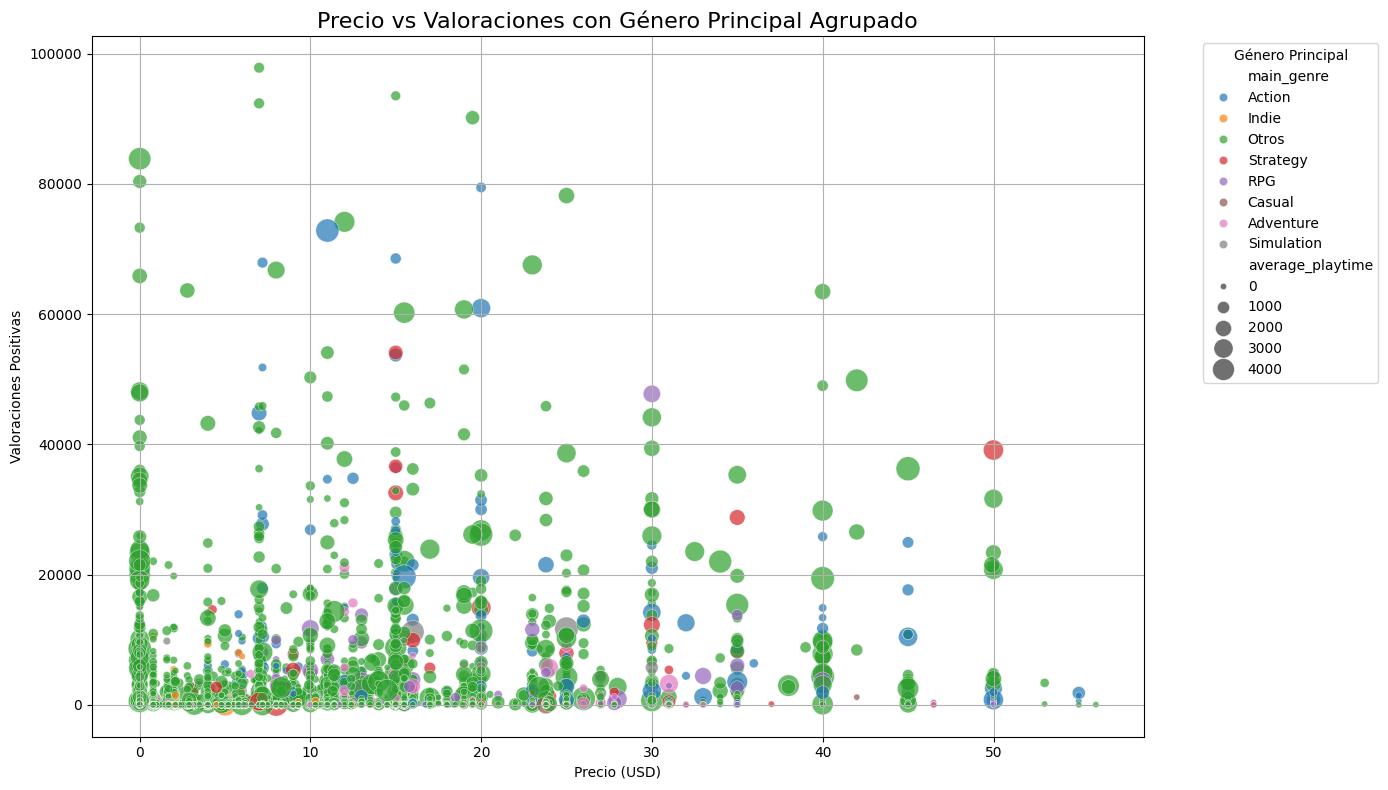

In [75]:
# Grafico multivariado
import seaborn as sns
import matplotlib.pyplot as plt

df_filtered = df[(df['price'] <= 60) &
                 (df['positive_ratings'] <= 100000) &
                 (df['average_playtime'] <= 5000)]

plt.figure(figsize=(14, 8))
sns.scatterplot(
    data=df_filtered,
    x="price",
    y="positive_ratings",
    hue="main_genre",
    size="average_playtime",
    alpha=0.7,
    sizes=(20, 300)
)

plt.title("Precio vs Valoraciones con Género Principal Agrupado", fontsize=16)
plt.xlabel("Precio (USD)")
plt.ylabel("Valoraciones Positivas")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Género Principal')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Relacion entre precio, genero y las valoraciones de los usuarios:

- La mayoría de los juegos con muchas valoraciones positivas tienden a tener un precio bajo o intermedio.
- Algunos géneros como **Action**, **Indie**, y **RPG** presentan juegos muy valorados con distintos niveles de precio.
- Se observa una gran densidad de juegos con precios entre 0 y 20 USD.
- El tamaño de las burbujas indica que varios juegos con muchas horas de juego también tienen buenas valoraciones y en su mayoria son **RPG**

> Nota: Para facilitar la interpretación visual, los géneros han sido agrupados en categorías principales para reducir la cantidad de elementos en la leyenda.

In [76]:
# Contar cantidad de juegos por género principal
genre_counts = df['main_genre'].value_counts()

# Filtrar géneros que aparecen al menos 30 veces
frequent_genres = genre_counts[genre_counts >= 30].index

# Crear nuevo dataframe filtrado
df_genres = df[df['main_genre'].isin(frequent_genres) & (df['price'] <= 100)]

<ipython-input-77-1758460877>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_genres, x='main_genre', y='price', palette='Set3')


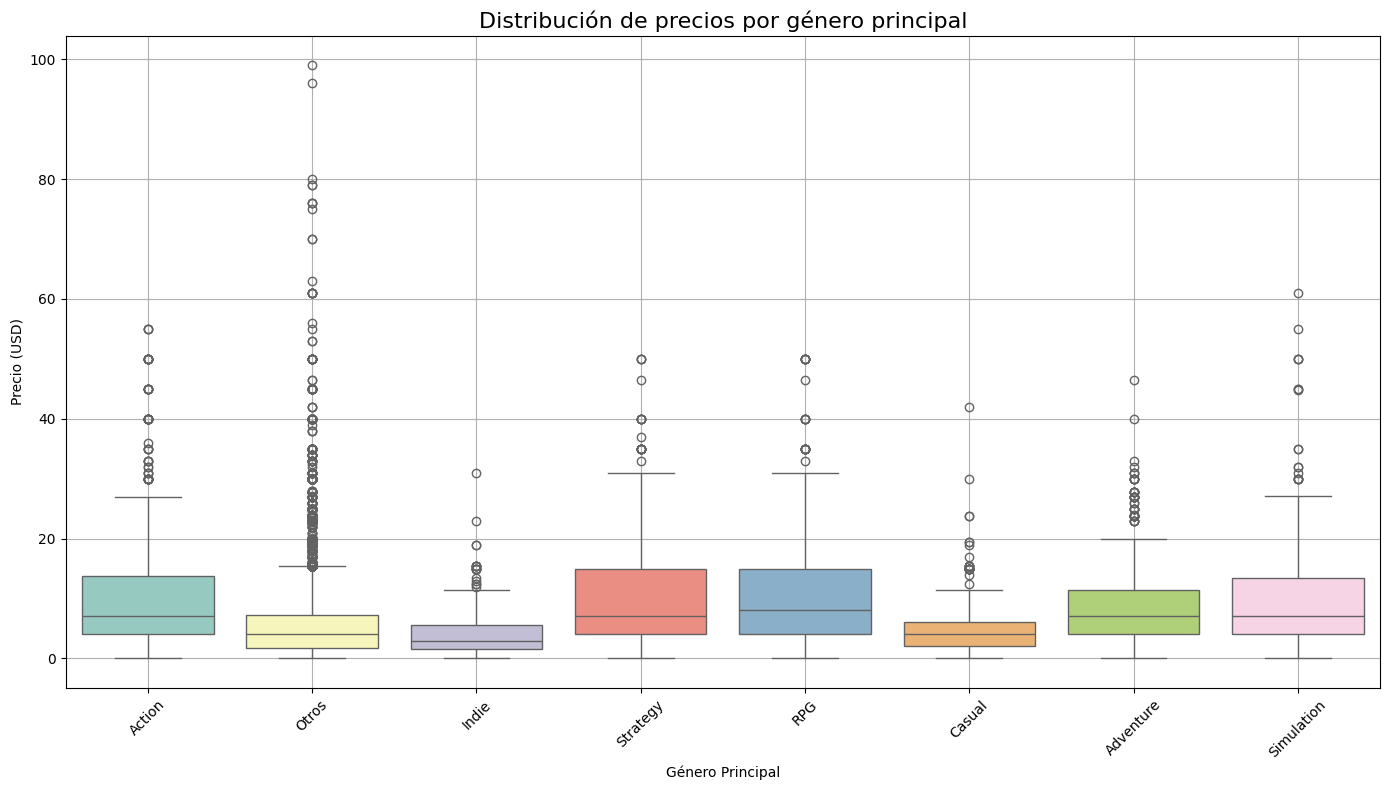

In [77]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=df_genres, x='main_genre', y='price', palette='Set3')

plt.xticks(rotation=45)
plt.title("Distribución de precios por género principal", fontsize=16)
plt.xlabel("Género Principal")
plt.ylabel("Precio (USD)")
plt.grid(True)
plt.tight_layout()
plt.show()

#### Distribución de Precios por Género Principal

Este boxplot permite visualizar la dispersión de precios dentro de cada género principal (considerando solo géneros con al menos 30 juegos).

**Observaciones:**
- Los géneros como *Simulation*, *Strategy* y *RPG* muestran precios más elevados y mayor variabilidad.
- Géneros como *Casual* o *Indie* tienden a ser más económicos y tienen menor dispersión de precios.
- Los outliers son comunes en varios géneros, con títulos específicos que alcanzan precios significativamente más altos que el promedio.

Este análisis refuerza la hipótesis de que géneros más complejos o de nicho (como *RPG* o *Strategy*) tienden a tener precios más altos.


In [78]:
# Filtrar juegos con precio mayor a 0
df_pagos = df[df['price'] > 0]

# Agrupamos por año y sacamos el precio promedio y la media
media = df_pagos.groupby('release_year')['price'].mean().reset_index()
mediana = df_pagos.groupby('release_year')['price'].median().reset_index()

# Filtramos para quedarnos con años razonables (Entre 2000 y 2025)
df_pagos = df_pagos[(df_pagos['release_year'] >= 2000) & (df_pagos['release_year'] <= 2020)]


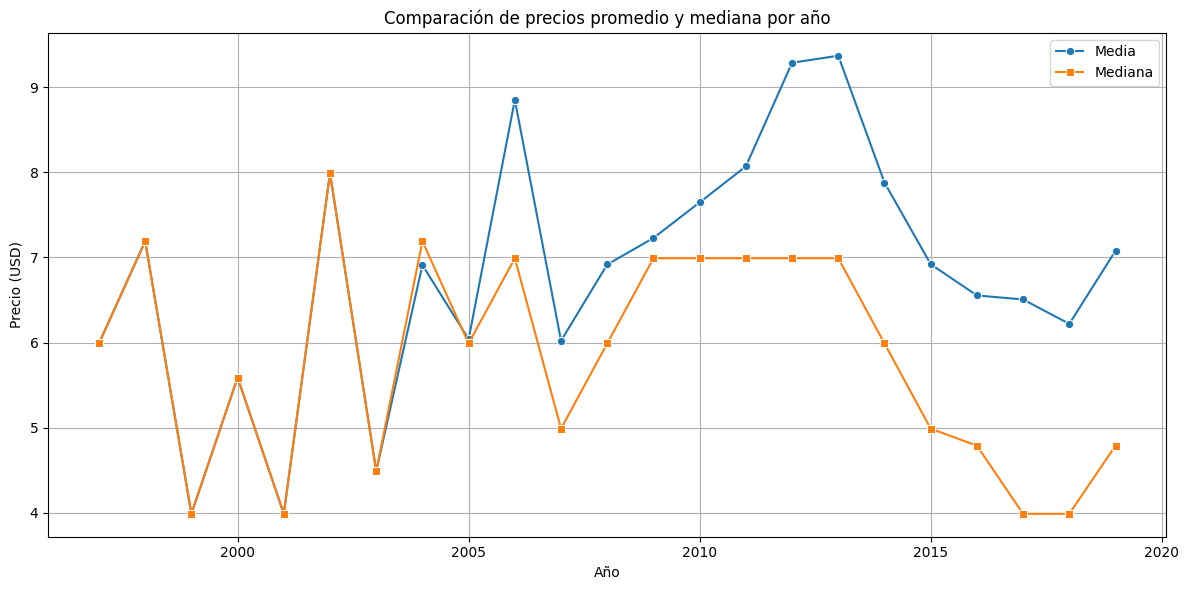

In [79]:
plt.figure(figsize=(12,6))
sns.lineplot(data=media, x='release_year', y='price', label='Media', marker='o')
sns.lineplot(data=mediana, x='release_year', y='price', label='Mediana', marker='s')
plt.title('Comparación de precios promedio y mediana por año')
plt.xlabel('Año')
plt.ylabel('Precio (USD)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


### Análisis de Precios de Videojuegos por Año de Lanzamiento

Para entender cómo evolucionaron los precios de los videojuegos a lo largo del tiempo, analizamos tanto la **media** como la **mediana** del precio por año.

### Filtro aplicado

- Se eliminaron los juegos gratuitos (`price = 0`) para evitar que distorsionen el promedio.

- Se incluyeron únicamente juegos lanzados entre los años **2000 y 2020**, ya que valores fuera de este rango pueden ser atípicos o poco representativos.

### Resultado

Se graficaron dos líneas:

- **Media**: muestra el promedio de precios por año.

- **Mediana**: muestra el valor central, útil para evitar que precios extremos afecten la lectura.

### Interpretación

- La **mediana** es más resistente a precios fuera de lo común y suele representar mejor el precio típico de un juego.
- A pesar de excluir los juegos gratuitos, los precios se mantienen relativamente bajos. Esto puede deberse a:
  - Predominio de juegos indie o casuales con precios accesibles.
  - Alta cantidad de títulos con precios entre 1 y 10 USD.
  - Filtros que aún podrían ser afinados por categoría o popularidad.

**MODELOS**


In [80]:
# Definir X e y
features = ['price', 'average_playtime', 'required_age', 'negative_ratings']
X = df[features]
y = df['positive_ratings']

# Entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [81]:
from sklearn.linear_model import LinearRegression

modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

In [82]:
y_pred = modelo.predict(X_test)

In [83]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MAE (Error absoluto medio):", mae)
print("MSE (Error cuadrático medio):", mse)
print("R2 (Coeficiente de determinación):", r2)


MAE (Error absoluto medio): 1363.60518127276
MSE (Error cuadrático medio): 1017978391.4277923
R2 (Coeficiente de determinación): -8.530903775023326


**Conclusion con modelo de regresion lineal:**




Se utilizó regresión lineal para predecir votos positivos.
Si bien el modelo se entrenó correctamente, los resultados mostraron bajo rendimiento (R² negativo).
Esto indica que con las variables seleccionadas, no se logra una predicción efectiva.
Se concluye que sería necesario probar con otras variables o cambiar el enfoque a clasificación.

In [84]:
# Crear la variable objetivo muy_valorado

df['muy_valorado'] = (df['positive_ratings'] > 1000).astype(int)


In [85]:
# Definimos x e y

X = df[['price', 'average_playtime', 'negative_ratings', 'required_age']]

y = df['muy_valorado']


In [86]:
# Dividir en entrenamiento y test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [87]:
# Entrenar el modelo KNN

from sklearn.neighbors import KNeighborsClassifier

# Creamos el modelo con k=5
modelo_knn = KNeighborsClassifier(n_neighbors=5)

# Entrenamos
modelo_knn.fit(X_train, y_train)


KNeighborsClassifier()

In [88]:
# Hacer predicciones

y_pred = modelo_knn.predict(X_test)


In [89]:
# Evaluar el modelo

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9551246537396122
Precision: 0.764018691588785
Recall: 0.697228144989339
F1 Score: 0.7290969899665551
Matriz de confusión:
 [[4845  101]
 [ 142  327]]


In [90]:
# Probar con distintos K

for k in range(1, 20):
    modelo = KNeighborsClassifier(n_neighbors=k)
    modelo.fit(X_train, y_train)
    pred = modelo.predict(X_test)
    acc = accuracy_score(y_test, pred)
    print(f"k={k} - Accuracy: {acc:.4f}")


k=1 - Accuracy: 0.9433
k=2 - Accuracy: 0.9483
k=3 - Accuracy: 0.9525
k=4 - Accuracy: 0.9546
k=5 - Accuracy: 0.9551
k=6 - Accuracy: 0.9538
k=7 - Accuracy: 0.9553
k=8 - Accuracy: 0.9566
k=9 - Accuracy: 0.9573
k=10 - Accuracy: 0.9588
k=11 - Accuracy: 0.9575
k=12 - Accuracy: 0.9590
k=13 - Accuracy: 0.9584
k=14 - Accuracy: 0.9592
k=15 - Accuracy: 0.9581
k=16 - Accuracy: 0.9584
k=17 - Accuracy: 0.9579
k=18 - Accuracy: 0.9588
k=19 - Accuracy: 0.9584


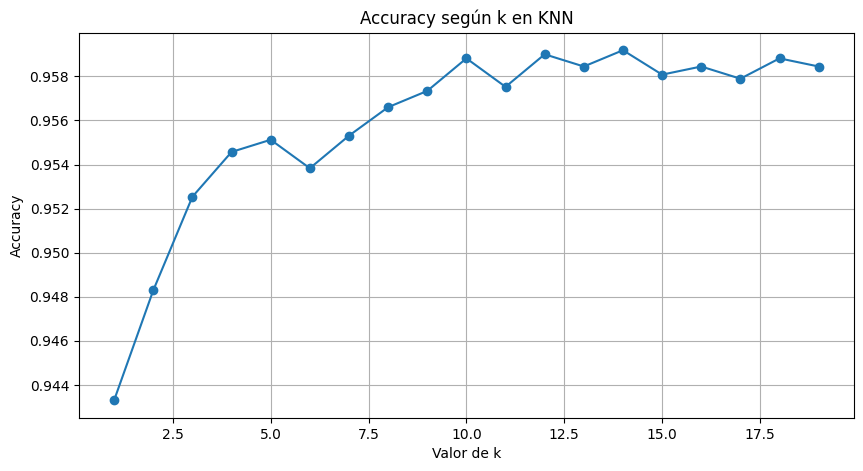

In [91]:
# Grafico que muestra que K-14 fue el mejor

import matplotlib.pyplot as plt

k_values = list(range(1, 20))
accuracies = []

for k in k_values:
    modelo = KNeighborsClassifier(n_neighbors=k)
    modelo.fit(X_train, y_train)
    pred = modelo.predict(X_test)
    acc = accuracy_score(y_test, pred)
    accuracies.append(acc)

plt.figure(figsize=(10,5))
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('Valor de k')
plt.ylabel('Accuracy')
plt.title('Accuracy según k en KNN')
plt.grid()
plt.show()


**Conclusion con modelo K-Nearest Neighbors:**

Probamos un modelo de clasificación usando K-Nearest Neighbors (KNN) con el objetivo de predecir si un juego iba a ser muy valorado por los usuarios. Para ello, tomamos como variables predictoras el precio, la edad mínima requerida, el tiempo promedio de juego y la cantidad de reseñas negativas.

Los resultados fueron muy buenos: obtuvimos un Accuracy del 95.9%, una Precisión del 76.4% y un Recall del 69.7%, lo cual indica que el modelo tiene una buena capacidad de identificar juegos exitosos sin cometer demasiados errores.

Esto muestra que ciertas características del juego, como el tiempo promedio de juego y el precio, pueden darnos una buena idea del nivel de valoración que recibirá. Sin embargo, también debemos tener en cuenta que algunos juegos altamente valorados pueden escapar al modelo por variables que no están incluidas (como la calidad gráfica, la historia, o el marketing).

